# 17- Transfer Learning

by [Alejandro Correa Bahnsen](http://www.albahnsen.com/)

version 1.0, July 2018

## Part of the class [Applied Deep Learning](https://github.com/albahnsen/AppliedDeepLearningClass)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Valerio Maggio](https://github.com/leriomaggio/deep-learning-keras-tensorflow)

Constructing and training your own ConvNet from scratch can be Hard and a long task.

A common trick used in Deep Learning is to use a pre-trained model and finetune it to the specific data it will be used for.

Transfer learning is an optimization, a shortcut to saving time or getting better performance.

In general, it is not obvious that there will be a benefit to using transfer learning in the domain until after the model has been developed and evaluated.

Lisa Torrey and Jude Shavlik in their chapter on transfer learning describe three possible benefits to look for when using transfer learning:

Higher start. The initial skill (before refining the model) on the source model is higher than it otherwise would be.
Higher slope. The rate of improvement of skill during training of the source model is steeper than it otherwise would be.
Higher asymptote. The converged skill of the trained model is better than it otherwise would be.
Three ways in which transfer might improve learning
Three ways in which transfer might improve learning.
Taken from “Transfer Learning”.

<img src="images/Three-ways-in-which-transfer-might-improve-learning.png" >

Ideally, you would see all three benefits from a successful application of transfer learning.

It is an approach to try if you can identify a related task with abundant data and you have the resources to develop a model for that task and reuse it on your own problem, or there is a pre-trained model available that you can use as a starting point for your own model.

On some problems where you may not have very much data, transfer learning can enable you to develop skillful models that you simply could not develop in the absence of transfer learning.

The choice of source data or source model is an open problem and may require domain expertise and/or intuition developed via experience.

## Famous Models with Keras


This notebook contains code and reference for the following Keras models (gathered from [https://github.com/fchollet/keras/tree/master/keras/applications]())

- VGG16
- VGG19
- ResNet50
- Inception v3
- Xception
- ... more to come


## References

- [Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556) - please cite this paper if you use the VGG models in your work.
- [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385) - please cite this paper if you use the ResNet model in your work.
- [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567) - please cite this paper if you use the Inception v3 model in your work.


All architectures are compatible with both TensorFlow and Theano, and upon instantiation the models will be built according to the image dimension ordering set in your Keras configuration file at `~/.keras/keras.json`. 

For instance, if you have set `image_data_format="channels_last"`, then any model loaded from this repository will get built according to the TensorFlow dimension ordering convention, "Width-Height-Depth".

# VGG16

<img src="images/vgg16.png" >

# VGG19

<img src="images/vgg19.png" heigth="10%" />

# `keras.applications`

In [1]:
from keras.applications import VGG16
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import os

/home/al/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
vgg16 = VGG16(include_top=True, weights='imagenet')
vgg16.summary()

553467904/553467096 [==============================] - 100s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_

If you're wondering **where** this `HDF5` files with weights is stored, please take a look at `~/.keras/models/`

#### HandsOn VGG16 - Pre-trained Weights

In [5]:
IMAGENET_FOLDER = 'images/imagenet'  #in the repo

In [6]:
!ls images/imagenet

apricot_565.jpeg  apricot_787.jpeg	strawberry_1174.jpeg
apricot_696.jpeg  strawberry_1157.jpeg	strawberry_1189.jpeg


<img src="images/imagenet/strawberry_1157.jpeg" width="40%" />

In [7]:
from keras.preprocessing import image
import numpy as np

img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
40960/35363 [==================================] - 0s 4us/step
Predicted: [[('n07745940', 'strawberry', 0.9857028), ('n07836838', 'chocolate_sauce', 0.0051280432), ('n04332243', 'strainer', 0.0036656512), ('n07614500', 'ice_cream', 0.0021994442), ('n04476259', 'tray', 0.001169128)]]


<img src="images/imagenet/apricot_696.jpeg" width="40%" />

In [8]:
img_path = os.path.join(IMAGENET_FOLDER, 'apricot_696.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07747607', 'orange', 0.8415038), ('n07749582', 'lemon', 0.053846765), ('n07717556', 'butternut_squash', 0.01779672), ('n03937543', 'pill_bottle', 0.015318865), ('n07720875', 'bell_pepper', 0.008361455)]]


<img src="images/imagenet/apricot_565.jpeg" width="40%" />

In [9]:
img_path = os.path.join(IMAGENET_FOLDER, 'apricot_565.jpeg')
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
print('Input image shape:', x.shape)

preds = vgg16.predict(x)
print('Predicted:', decode_predictions(preds))

Input image shape: (1, 224, 224, 3)
Predicted: [[('n07718472', 'cucumber', 0.37633207), ('n07716358', 'zucchini', 0.2588565), ('n07711569', 'mashed_potato', 0.04936713), ('n07716906', 'spaghetti_squash', 0.033635516), ('n12144580', 'corn', 0.031457204)]]


# Residual Networks

<img src="images/resnet_bb.png" >

## ResNet 50

<img src="images/resnet34.png" >

In [10]:
from keras.applications import ResNet50

A ResNet is composed by two main blocks: **Identity Block** and the **ConvBlock**.

* IdentityBlock is the block that has no conv layer at shortcut
* ConvBlock is the block that has a conv layer at shortcut

---

# Visualising Convolutional Filters of a CNN

In [12]:
import numpy as np
import time
from keras.applications import vgg16
from keras import backend as K

In [13]:
from matplotlib import pyplot as plt

%matplotlib inline

In [14]:
# dimensions of the generated pictures for each filter.
IMG_WIDTH = 224
IMG_HEIGHT = 224

In [15]:
from keras.applications import vgg16

# build the VGG16 network with ImageNet weights
vgg16 = vgg16.VGG16(weights='imagenet', include_top=False)
print('Model loaded.')

Model loaded.


In [16]:
vgg16.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [17]:
from collections import OrderedDict
layer_dict = OrderedDict()
# get the symbolic outputs of each "key" layer (we gave them unique names).
for layer in vgg16.layers[1:]:
    layer_dict[layer.name] = layer

#### Test Image

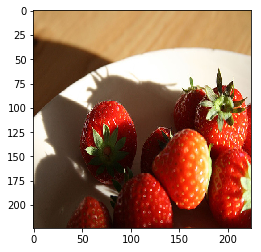

In [18]:
img_path = os.path.join(IMAGENET_FOLDER, 'strawberry_1157.jpeg')
img = image.load_img(img_path, target_size=(IMG_WIDTH, IMG_HEIGHT))
plt.imshow(img)

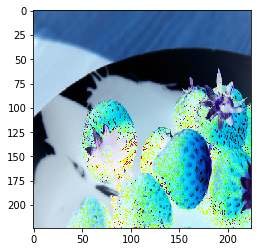

In [19]:
input_img_data = image.img_to_array(img)
# input_img_data /= 255
plt.imshow(input_img_data)

In [20]:
input_img_data = np.expand_dims(input_img_data, axis=0)
print('Input image shape:', input_img_data.shape)

Input image shape: (1, 224, 224, 3)


### Visualising Image throught the layers

In [21]:
def get_activations(model, layer, input_img_data):
    activations_f = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activations_f((input_img_data, False))
    return activations

In [22]:
layer_name = 'block1_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)

In [24]:
print(len(activations))
activation = activations[0]
activation.shape

1


(1, 224, 224, 64)

In [25]:
layer.filters  # no. of filters in the selected conv block

64

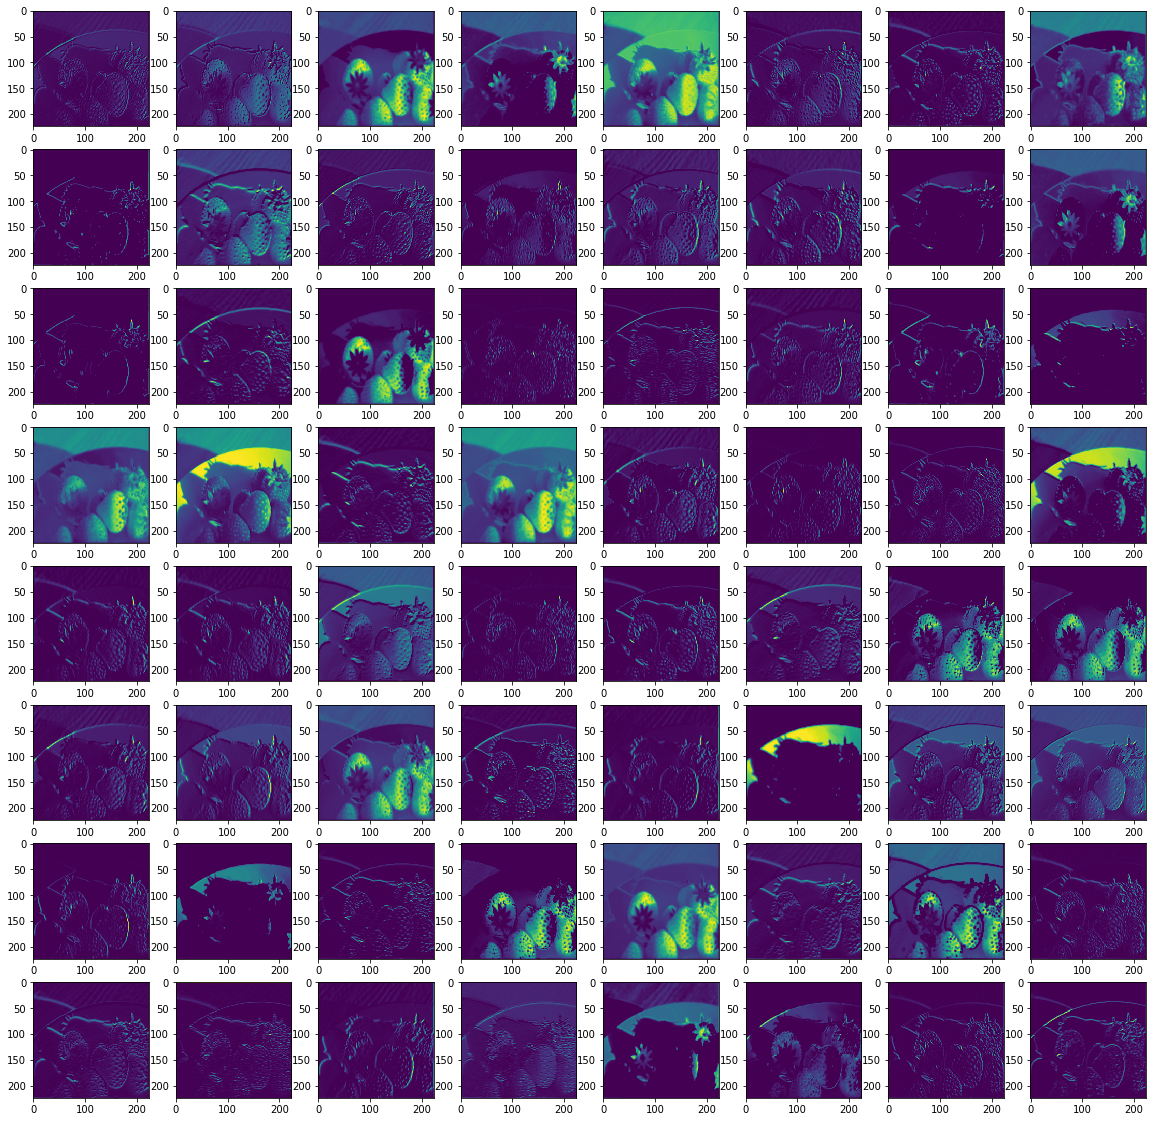

In [26]:
activated_img = activation[0]
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

In [27]:
conv_img_mean = np.mean(activated_img, axis=2)

In [28]:
conv_img_mean.shape

(224, 224)

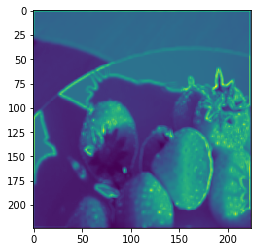

In [29]:
plt.imshow(conv_img_mean)

#### Now visualise the first 64 filters of the `block5_conv2` layer

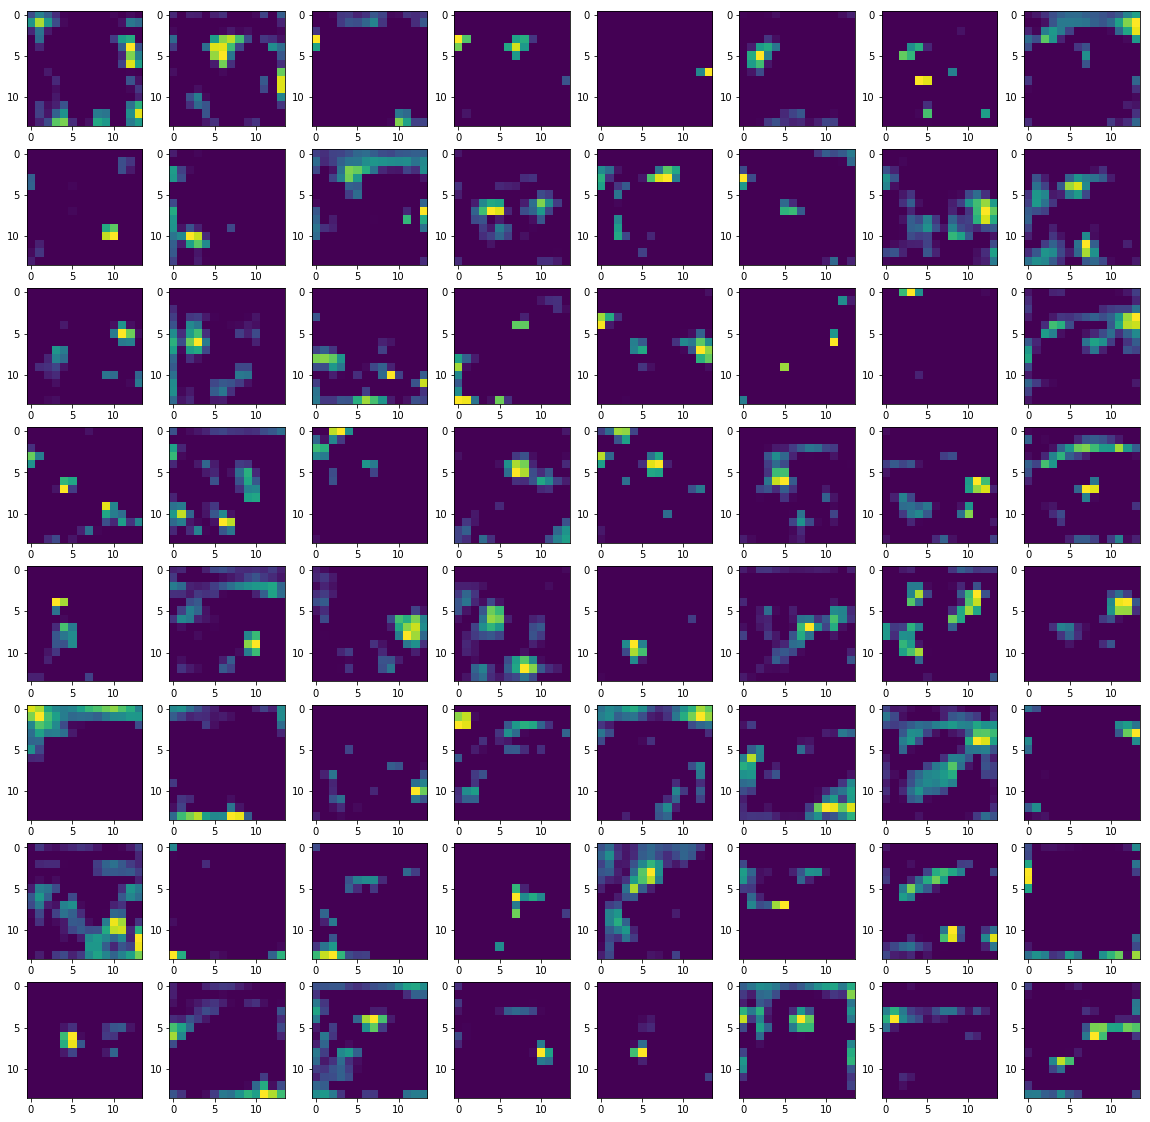

In [30]:
layer_name = 'block5_conv2'
layer = layer_dict[layer_name]
activations = get_activations(vgg16, layer, input_img_data)
activated_img = activations[0][0]  # [0][0] -> first (and only) activation, first (and only) sample in batch
n = 8
fig = plt.figure(figsize=(20, 20))
for i in range(n):
    for j in range(n):
        idx = (n*i)+j
        ax = fig.add_subplot(n, n, idx+1)
        ax.imshow(activated_img[:,:,idx])

# Examples Googlenet

http://www.csc.kth.se/~roelof/deepdream/bvlc_googlenet.html